## 단일집단 t 검정
## stats.ttest_1samp(샘플, 평균)
## 정규성검증
### stats.shapiro

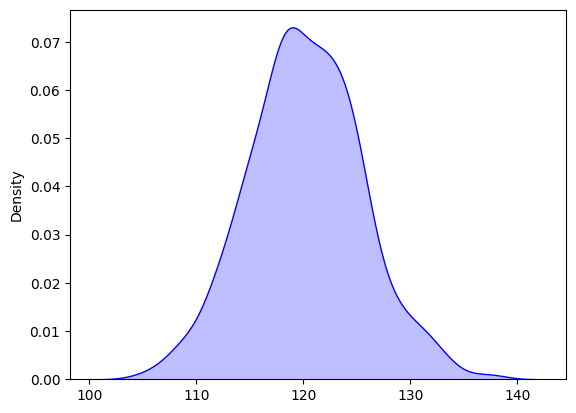

samples are satisfied for normality as group1: 0.64
t = -3.562277827228347
p = 0.00040291427939204177


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

no_samples = 500 # 샘플수

group = stats.norm(120,5).rvs(no_samples) # 평균이 120이고 분산이 5인 샘
sns.kdeplot(data=group,color='blue',fill=True) # 위 조건에 대한 정규분포
plt.show()

pv_of_group = stats.shapiro(group)[1] # p value - 정규성 검사 -> 샘플 데이터가 정규성을 가지고 있는지 확인 : p>0.05일때, 귀무가설 채택

if pv_of_group > 0.05: # 정규성을 가지는 경우 
     print("samples are satisfied for normality as group1: %3.2f" %(pv_of_group))
     
     t,p = stats.ttest_1samp(group,121) # 가설평균이 121일때, t검정 값과 p값 구하기
     print("t = " + str(t)) # t값 = 샘플의 평균과 121이 얼마나 떨어져있는지
     print("p = " + str(p)) # p값 = 121이 샘플의 평균이라고 확신할 수 있는 확률
     
# 양측검정 / 단측검정
     
else:
     print("normality test is not satisfied")

## 남자어린이 키
## 1196,1340,1232,1184,1295,1247,1201,1182,1192,1287,1159,1160,1243,1264,1276

In [ ]:
data = [1196,1340,1232,1184,1295,1247,1201,1182,1192,1287,1159,1160,1243,1264,1276]
pvV = stats.shapiro(data)[1] # [1]의 의미 : stats.shapiro는 튜플 형식으로 [검정통계량, p-value]가 나옴. 그중 p-value만 가져오기 위함

if pvV > 0.05: # 정규성 검사 통과 
     print("samples are satisfied for normality as group1: %3.2f" %(pvV))
     
     t,p = stats.ttest_1samp(data,1220)
     print("t = " + str(t)) # data의 평균이 1220에서 얼마나 떨어져 있는가?
     print("p = " + str(p)) # 데이터가 평균 1220이라는 귀무가설(H₀)을 기각할만한 증거가 없다. 즉 1220이 평균이다라는 가설을 채택 가능.

     
else:
     print("normality test is not satisfied")

samples are satisfied for normality as group1: 0.49
t = 0.7528774249715862
p = 0.4639961960024156


## 여아 신생아의 몸무게
### 3837,3334,2208,1745,2576,3208,3746,3523,3430,3480,3116,3428,2184,2383,3500,3866,3542,3278
### 평균 2800과 비교하기

In [5]:
## t, p 구하기
data = [3837,3334,2208,1745,2576,3208,3746,3523,3430,3480,3116,3428,2184,2383,3500,3866,3542,3278]
Pvv = stats.shapiro(data)[1] # 정규성 검사

if Pvv > 0.05:
    print("정규성 있음 : %3.2f" %(Pvv))
    t,p = stats.ttest_1samp(data,2800)
    print("t: "+ str(t))
    print("p: "+ str(p))
else:
    print("정규성 없음.")

정규성 없음.


---

## 두 모집단의 평균차이 검정

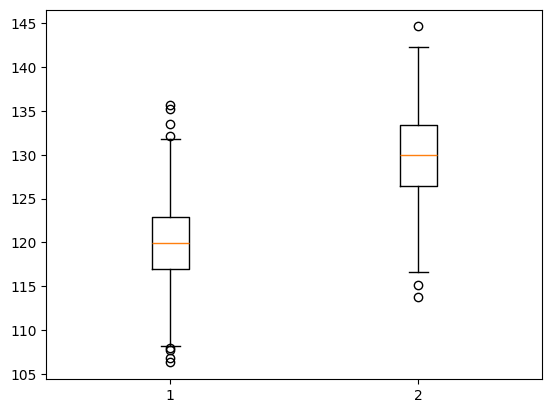

정규성 0.3517825999745464 0.26822041946840214
LeveneResult(statistic=np.float64(0.8669500969873386), pvalue=np.float64(0.3520262117077696))


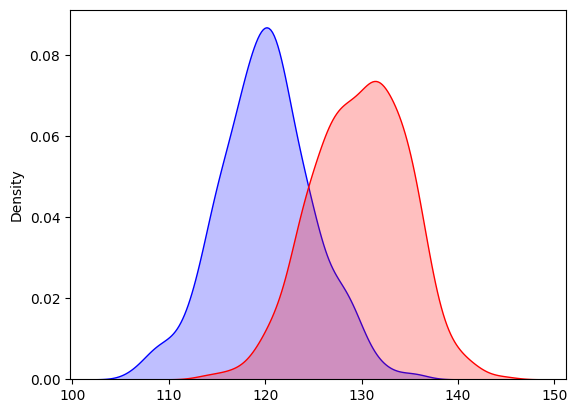

2 samples are satisfied for normality as group1: 0.35, group2: 0.27
t = -31.746867832675633
p = 1.8579232874197566e-153


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats

no_samples1 = 500
no_samples2 = 500

group1 = stats.norm(120,5).rvs(no_samples1) # 평균이 120, 표준편차5 
group2 = stats.norm(130,5).rvs(no_samples2) # 평균이 130, 표준편차5 -> 두 모집단 샘플에 대한 랜덤샘플 500개 생성


plot_data = [group1, group2]
plt.boxplot(plot_data)
plt.show() # 이상치 많음


pv_of_group1 = stats.shapiro(group1)[1] # 두 샘플에 대해 각각 정규성 검사 
pv_of_group2 = stats.shapiro(group2)[1]

print("정규성", pv_of_group1,pv_of_group2)

print(stats.levene(group1,group2)) # 등분산성 검사 - 두 그룹의 분산이 같은지 판단 : p value > 0.05이면 등분산성 충족

sns.kdeplot(data=group1,color='blue',fill=True)
sns.kdeplot(data=group2,color='red',fill=True)
plt.show()

if pv_of_group1 > 0.05 and pv_of_group2 > 0.05: 
     print("2 samples are satisfied for normality as group1: %3.2f, group2: %3.2f"\
           %(pv_of_group1,pv_of_group2))
     pv_of_var = stats.levene(group1,group2)[1] # 등분산성 검사 - t검정은 두 그룹의 분산이 같다는 전제하에 이루어지기 때문(같은 표준편차 5를 줬지만 샘플 랜덤 추출에서 값이 다르게 추출될 수 있음음)
     if pv_of_var > 0.05:
           t,p = stats.ttest_ind(group1,group2, alternative='two-sided') # 두 그룹 평균을 비교, 양측 검정(차이가 있는지지)
           print("t = " + str(t))
           print("p = " + str(p))

else:
     print("Non-parametric test result")
     print(stats.kruskal(group1, group2))
     print(stats.ks_2samp(group1, group2))

0.20224825440795424 0.017984789994719325


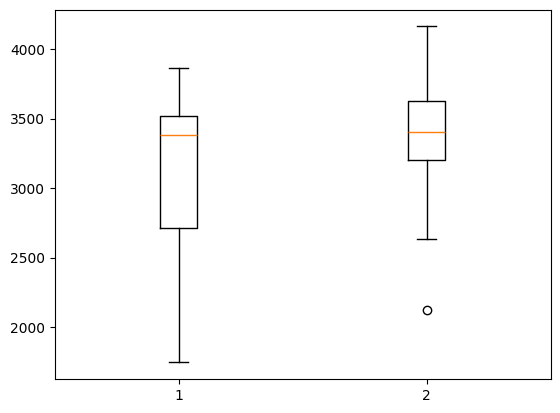

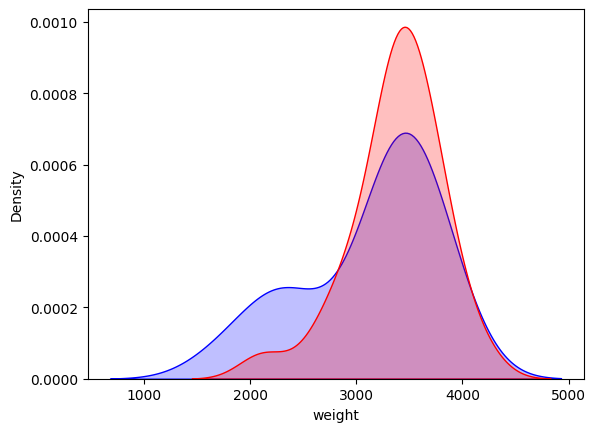

In [3]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('babyweight.csv')
girl = data[data['gender'] == 1]['weight']
boy = data[data['gender'] == 2]['weight']

pv_of_group1 = stats.shapiro(boy)[1]
pv_of_group2 = stats.shapiro(girl)[1]

print(pv_of_group1,pv_of_group2)

plot_data = [girl, boy]
plt.boxplot(plot_data)
plt.show()

sns.kdeplot(data=girl,color='blue',fill=True)
sns.kdeplot(data=boy,color='red',fill=True)
plt.show()

## ===============
## t 값과 p값 구하기 양방향 검증


---

### 쌍체검정

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats

no_samples1 = 500
no_samples2 = 500

group1 = stats.norm(120,5).rvs(no_samples1)
group2 = stats.norm(125,5).rvs(no_samples2)


plot_data = [group1, group2]
plt.boxplot(plot_data)
plt.show()


pv_of_group1 = stats.shapiro(group1)[1]
pv_of_group2 = stats.shapiro(group2)[1]

if pv_of_group1 > 0.05 and pv_of_group2 > 0.05:
     print("2 samples are satisfied for normality as group1: %3.2f, group2: %3.2f"\
           %(pv_of_group1,pv_of_group2))
     pv_of_var = stats.levene(group1,group2)[1]
     if pv_of_var > 0.05:
           result = stats.ttest_rel(group1,group2, alternative='two-sided')
           print("t = ", result[0])
           print("p = ", result[1])

else:
     print("Non-parametric test result")
     print(stats.kruskal(group1, group2))
     print(stats.ks_2samp(group1, group2))

result = stats.ttest_rel(group1,group2, alternative='two-sided')
print(result)
     

## anorexia.csv 파일 받아서 검정

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import scipy.stats as stats

data = pd.read_csv('anorexia.csv')

group1 = data['Prior']
group2 = data['Post']


plot_data = [group1, group2]
plt.boxplot(plot_data)
plt.show()


pv_of_group1 = stats.shapiro(group1)[1]
pv_of_group2 = stats.shapiro(group2)[1]

## t, p 값 구하기
